# KNN

## 导入相关库

In [1]:
from collections import Counter  
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## 数据预处理过程

In [2]:
# 数据读取
data = pd.read_csv('data.csv')
# 定义特征列 标签列
c=['二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']
X = data[c].values
y = data['类型'].values
# 使用train_test_split划分进训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003) # 设定随机种子

## 实现KNN具体细节

In [9]:
def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    # your code
    dista = np.sqrt(np.sum((instance1 - instance2) ** 2))
    return dista


def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array型
    k: 选择多少个neighbors? 
    """
    # your code  
    euler = []
    for i in range(len(X)):
        dst = euc_dis(X[i], testInstance)
        euler.append((dst, y[i]))
    euler.sort(key = lambda value: value[0]) 
    nbos = euler[:k] 
    votes = {}
    for nbor in nbos:
        labels = nbor[1]
        votes[labels] = votes.get(labels, 0) + 1
    p_label = max(votes, key=votes.get)  
    return p_label
    

## 预测结果、及准确率计算

In [10]:
# 预测结果。   
K = 3 
predictions = [knn_classify(X_train, y_train, data, K) for data in X_test]
print("预测结果为：", predictions)
print("实际结果为：", list(y_test))

# 准确率计算
correct = np.count_nonzero((predictions==y_test)==True)
print ("Accuracy is: %.3f" %(correct/len(X_test)))

预测结果为： ['铅钡', '铅钡', '铅钡', '高钾', '铅钡', '高钾', '铅钡', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡', '高钾', '高钾', '高钾']
实际结果为： ['铅钡', '铅钡', '铅钡', '高钾', '铅钡', '高钾', '铅钡', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡', '高钾', '高钾', '高钾']
Accuracy is: 1.000


# 决策树

In [11]:
import pandas as pd
from sklearn import tree#导入模块
# 读取附件的表单1与表单2
# your code
df1 = pd.read_excel("附件.xlsx",sheet_name=0 )
df2 = pd.read_excel("附件.xlsx",sheet_name=1 )
df1.head(5)

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [12]:
# 为减少难度，将表单2数据中的空值设为0
# your code
df2 = df2.fillna(0)
df2.head(5)

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,03部位1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,03部位2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [13]:
# 各成分比例的累加和应为 100%，但因检测手段等原因可能导致其成分比例的累加和非100%的情况。本题中将成分比例累加和介于 85%~105%之间的数据视为有效数据。
# 提取有效数据
# your code
df = df2.loc[: , "二氧化硅(SiO2)":"二氧化硫(SO2)"]
df2['sum'] = df.sum(axis = 1)
df2.drop(df2[ df2['sum'] < 85].index, inplace=True)
df2.drop(df2[ df2['sum'] > 105].index, inplace=True)
df2.head(5)

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,03部位1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,03部位2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06


In [14]:
# 将表单1与表单2联合，以便后续分析。为减少难度，表单2中的文物采样点只考虑编号，不考虑状态，如“42未风化点1”视为42，“43部位1”视为43。
# your code
df2['文物采样点']=df2['文物采样点'].str[ :2]
df2['文物采样点']=df2['文物采样点'].astype('int')
df = pd.merge(df1, df2, left_on = '文物编号', right_on = '文物采样点')
df.head()

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),...,氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,1,C,高钾,蓝绿,无风化,1,69.33,0.0,9.99,6.32,...,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,2,A,铅钡,浅蓝,风化,2,36.28,0.0,1.05,2.34,...,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,3,A,高钾,蓝绿,无风化,3,87.05,0.0,5.19,2.01,...,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,3,A,高钾,蓝绿,无风化,3,61.71,0.0,12.37,5.87,...,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,4,A,高钾,蓝绿,无风化,4,65.88,0.0,9.67,7.12,...,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06


- [一小时实践入门 Graphviz](https://zhuanlan.zhihu.com/p/644358139)

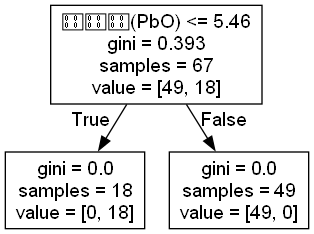

In [15]:
import graphviz
from sklearn import tree
from IPython.display import Image

# 选取各个化学成分作为决策特征
c=['二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']

# 导入graphviz包，实例化决策树模型，并将表中的每种化学成分输入作为决策特征，将玻璃的类型作为分类特征输入决策树中，并利用graphviz进行可视化
# your code
clf = tree.DecisionTreeClassifier()
X = df[c]
y = df['类型']
clf.fit(X, y)
data = tree.export_graphviz(clf, feature_names =c)
graph = graphviz.Source(data)
graph.render('tree', format = 'png') 
Image(filename='tree.png')

# SVM

In [16]:
# 为减少难度，去除表单2中采样点未风化的数据，并将两个表单做联合
# your code 
df2 = pd.read_excel("附件.xlsx",sheet_name=1)
df2 = df2.fillna(0)
df2.drop( df2[df2['文物采样点'].str.find("未风化") != -1].index , inplace = True)
df = df2.loc[: , "二氧化硅(SiO2)":"二氧化硫(SO2)"]
df2['sum'] = df.sum(axis = 1)
df2.drop(df2[ df2['sum'] > 105].index, inplace=True)
df2.drop(df2[ df2['sum'] < 85].index, inplace=True)
df2['文物采样点'] =   df2['文物采样点'].str[:2]
df2['文物采样点'] = df2['文物采样点'].astype('int')
df = pd.merge(df1, df2, left_on='文物编号', right_on='文物采样点')
df.head()

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),...,氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,1,C,高钾,蓝绿,无风化,1,69.33,0.0,9.99,6.32,...,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,2,A,铅钡,浅蓝,风化,2,36.28,0.0,1.05,2.34,...,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,3,A,高钾,蓝绿,无风化,3,87.05,0.0,5.19,2.01,...,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,3,A,高钾,蓝绿,无风化,3,61.71,0.0,12.37,5.87,...,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,4,A,高钾,蓝绿,无风化,4,65.88,0.0,9.67,7.12,...,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06


In [20]:
from sklearn.svm import SVC
# 导入SVM包，实列化SVM模型并对数据进行训练。
# df为上一步中联合后的数据[请根据实际处理过程修改]，取前30个数据为训练集，其余数据为测试集
train=df[:30]
test=df[30:]
# 训练模型，其中各化学成分为训练特征，文物是否风化为分类特征，并输出训练分数
# your code
t_model = SVC()
X_train = train[c]
y_train = train['表面风化']
t_model.fit(X_train, y_train)
tra_score = t_model.score(X_train, y_train)
te_score = t_model.score(test[c], test['表面风化'])
print("训练集: ",tra_score)
print("测试集: ",te_score)

训练集:  0.8666666666666667
测试集:  0.9629629629629629


In [18]:
# 打印出测试集的实际标签与预测得出的标签
# your code
X_test = test[c]
y_test_act = test['表面风化']
y_test_pre = t_model.predict(X_test)
print("预测为: ",y_test_act.values)
print("实际为: ",y_test_pre)

预测为:  ['无风化' '无风化' '风化' '无风化' '风化' '无风化' '风化' '风化' '风化' '风化' '风化' '风化' '无风化'
 '无风化' '无风化' '风化' '风化' '风化' '风化' '风化' '风化' '风化' '风化' '无风化' '风化' '风化' '风化']
实际为:  ['无风化' '无风化' '风化' '无风化' '风化' '无风化' '风化' '风化' '风化' '风化' '风化' '风化' '无风化'
 '无风化' '无风化' '无风化' '风化' '风化' '风化' '风化' '风化' '风化' '风化' '无风化' '风化' '风化' '风化']
